**Here I am implemnting various community detection algorithms in a social network**

**Dataset: Dolphin Social Network**

**Used Algorithms:**
1. CPM algorithm, also known as the Clique Percolation Method
2. Girvan-Newman algorithm
3. Louvain algorithm

In [85]:
#Importing necessary libraries
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
from networkx.algorithms.community.quality import modularity

In [86]:
# Load the Dolphin Social Network dataset
G = nx.read_gml('/content/dolphins.gml')

In [87]:
# Print node names and degrees
print("Node Name                      | Degree |")
print("--------------------------------------+-------")
for n, d in G.degree():
    print(f"{n:30} | {d:5} |")

Node Name                      | Degree |
--------------------------------------+-------
Beak                           |     6 |
Beescratch                     |     8 |
Bumper                         |     4 |
CCL                            |     3 |
Cross                          |     1 |
DN16                           |     4 |
DN21                           |     6 |
DN63                           |     5 |
Double                         |     6 |
Feather                        |     7 |
Fish                           |     5 |
Five                           |     1 |
Fork                           |     1 |
Gallatin                       |     8 |
Grin                           |    12 |
Haecksel                       |     7 |
Hook                           |     6 |
Jet                            |     9 |
Jonah                          |     7 |
Knit                           |     4 |
Kringel                        |     9 |
MN105                          |     6 |
MN23     

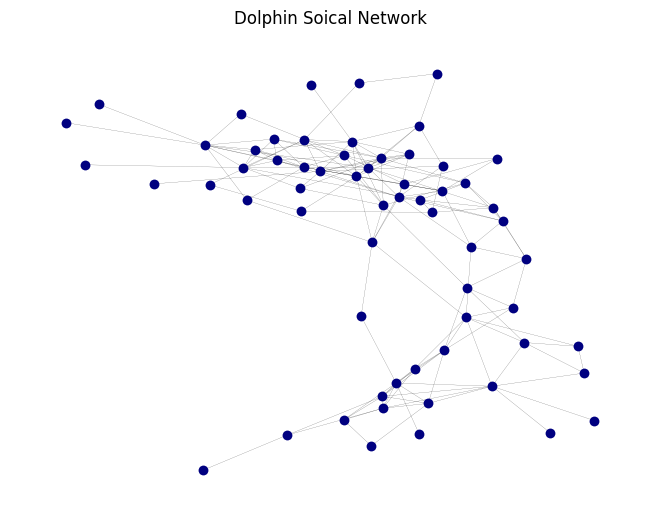

In [88]:
options = {"node_color": "Navy", "node_size": 50, "linewidths": 0, "width": 0.1}
pos = nx.spring_layout(G, seed=1969) # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.title('Dolphin Soical Network')
plt.show()

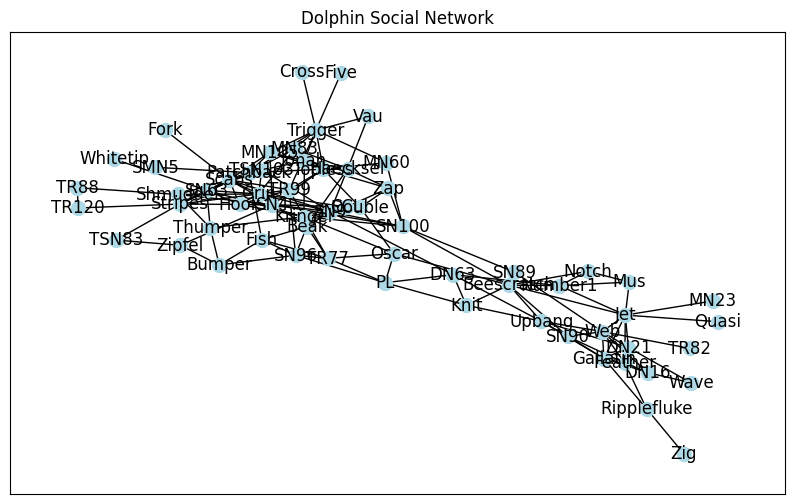

In [89]:
# Visualize the network
pos = nx.spring_layout(G)  # Choose a layout algorithm for network visualization
plt.figure(figsize=(10, 6))
nx.draw_networkx(G, pos=pos, with_labels=True, node_size=100, node_color='lightblue')
plt.title('Dolphin Social Network')
plt.show()

In [90]:
#finding the cliques
list(nx.find_cliques(G))

[['MN23', 'Jet'],
 ['SMN5', 'Patchback'],
 ['Zap', 'Haecksel', 'Topless'],
 ['Zap', 'SN100'],
 ['Zap', 'Double', 'Topless'],
 ['Zap', 'Double', 'CCL'],
 ['Trigger', 'Cross'],
 ['Trigger', 'Five'],
 ['Trigger', 'Topless', 'MN60'],
 ['Trigger', 'Topless', 'TR99'],
 ['Trigger', 'Topless', 'Jonah', 'Patchback', 'MN83'],
 ['Trigger', 'Topless', 'Jonah', 'Patchback', 'MN105'],
 ['Trigger', 'Vau'],
 ['Patchback', 'Stripes'],
 ['Patchback', 'Fish'],
 ['Patchback', 'TSN103'],
 ['Haecksel', 'SN9', 'Beak'],
 ['Haecksel', 'Vau'],
 ['Haecksel', 'Jonah', 'MN83', 'Topless'],
 ['SN96', 'TR99'],
 ['SN96', 'TR77', 'Fish', 'Beak'],
 ['SN96', 'TR77', 'PL'],
 ['SN96', 'Bumper', 'Fish'],
 ['Gallatin', 'Upbang', 'Web', 'DN21'],
 ['Gallatin', 'Upbang', 'Web', 'SN90'],
 ['Gallatin', 'Feather', 'Ripplefluke'],
 ['Gallatin', 'Feather', 'Web', 'Jet', 'DN21'],
 ['Gallatin', 'Feather', 'Web', 'DN16'],
 ['Gallatin', 'Feather', 'Web', 'SN90'],
 ['Bumper', 'Zipfel'],
 ['Bumper', 'Thumper'],
 ['PL', 'DN63', 'Knit'],
 [

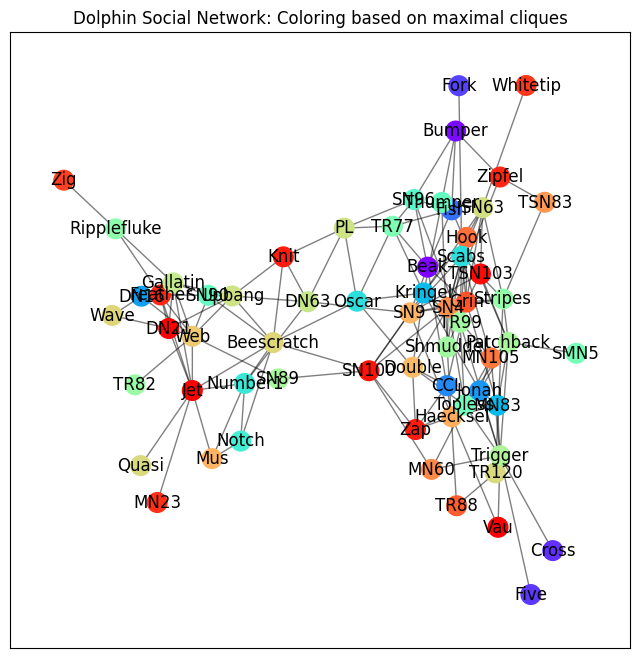

In [91]:
# Identify maximal cliques in the graph
maximal_cliques = list(nx.find_cliques(G))

# Create a dictionary to store the community colors
community_colors = {}

# Assign a different color to each community
for i, clique in enumerate(maximal_cliques):
    for node in clique:
        community_colors[node] = i

# Visualization
pos = nx.spring_layout(G)  # Positioning of nodes for visualization

# Draw the graph with community colors
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_color=list(community_colors.values()), cmap='rainbow', node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title('Dolphin Social Network: Coloring based on maximal cliques')
plt.show()

## **1. CPM ALGORITHM**

In [92]:
def cpm_algorithm(graph, k):
    # Step 1: Find all k-cliques
    cliques = list(nx.enumerate_all_cliques(graph))
    k_cliques = [clique for clique in cliques if len(clique) >= k]

    # Step 2: Build a clique graph
    clique_graph = nx.Graph()
    for i, clique1 in enumerate(k_cliques):
        clique_graph.add_node(i)
        for j, clique2 in enumerate(k_cliques[i + 1:]):
            intersection = set(clique1) & set(clique2)
            if len(intersection) == k - 1:
                clique_graph.add_edge(i, i + j + 1)

    # Step 3: Find the overlapping communities
    communities = list(nx.connected_components(clique_graph))

    # Step 4: Post-process the communities
    final_communities = []
    for community in communities:
        node_set = set()
        for c in community:
            node_set.update(k_cliques[c])
        final_communities.append(node_set)

    return final_communities

# Set the parameter k
k = 4

# Apply the CPM algorithm
result = cpm_algorithm(G, k)

# Print the detected communities
for i, community in enumerate(result):
    print(f"Community {i+1}: {community}")


Community 1: {'Fish', 'SN96', 'Beak', 'TR77'}
Community 2: {'DN21', 'Jet', 'DN16', 'SN90', 'Feather', 'Upbang', 'Web', 'Gallatin'}
Community 3: {'Stripes', 'Grin', 'Shmuddel', 'Hook', 'SN9', 'SN63', 'SN4', 'TR99', 'Scabs'}
Community 4: {'Jonah', 'MN83', 'Trigger', 'Patchback', 'Haecksel', 'MN105', 'Topless'}


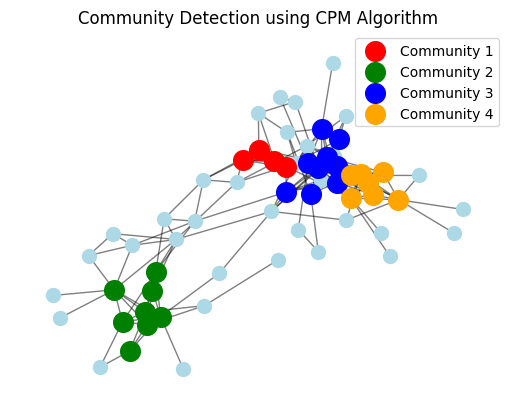

In [93]:
# Visualize the communities
pos = nx.spring_layout(G)  # Layout for the visualization

# Draw nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw each community with a different color
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
for i, community in enumerate(result):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i % len(colors)], node_size=200, label=f'Community {i+1}')

# Set plot options
plt.title('Community Detection using CPM Algorithm')
plt.legend()
plt.axis('off')
plt.show()

## **2. GRIVAN NEWMAN ALGORITHM**

In [94]:
def girvan_newman_algorithm(graph):
    # Make a copy of the graph
    G_copy = graph.copy()
    
    # Initialize the list to store the communities
    communities = []
    
    while G_copy.number_of_edges() > 0:
        # Calculate the betweenness centrality of each edge
        edge_betweenness = nx.edge_betweenness_centrality(G_copy)
        
        # Sort the edges based on betweenness centrality in descending order
        sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)
        
        # Remove the edge with the highest betweenness centrality
        edge_to_remove = sorted_edges[0][0]
        G_copy.remove_edge(*edge_to_remove)
        
        # Check if the removal of the edge has resulted in new communities
        new_components = list(nx.connected_components(G_copy))
        
        if len(new_components) > len(communities):
            communities = new_components
        
    return communities

# Apply the Girvan-Newman algorithm
result = girvan_newman_algorithm(G)


In [95]:
# Print the communities
for i, community in enumerate(result):
    print(f"Community {i+1}: {community}")

Community 1: {'Beak'}
Community 2: {'Beescratch'}
Community 3: {'Bumper'}
Community 4: {'CCL'}
Community 5: {'Cross'}
Community 6: {'DN16'}
Community 7: {'DN21'}
Community 8: {'DN63'}
Community 9: {'Double'}
Community 10: {'Feather'}
Community 11: {'Fish'}
Community 12: {'Five'}
Community 13: {'Fork'}
Community 14: {'Gallatin'}
Community 15: {'Grin'}
Community 16: {'Haecksel'}
Community 17: {'Hook'}
Community 18: {'Jet'}
Community 19: {'Jonah'}
Community 20: {'Knit'}
Community 21: {'Kringel'}
Community 22: {'MN105'}
Community 23: {'MN23'}
Community 24: {'MN60'}
Community 25: {'MN83'}
Community 26: {'Mus'}
Community 27: {'Notch'}
Community 28: {'Number1'}
Community 29: {'Oscar'}
Community 30: {'Patchback'}
Community 31: {'PL'}
Community 32: {'Quasi'}
Community 33: {'Ripplefluke'}
Community 34: {'Scabs'}
Community 35: {'Shmuddel'}
Community 36: {'SMN5'}
Community 37: {'SN100'}
Community 38: {'SN4'}
Community 39: {'SN63'}
Community 40: {'SN89'}
Community 41: {'SN9'}
Community 42: {'SN90'}

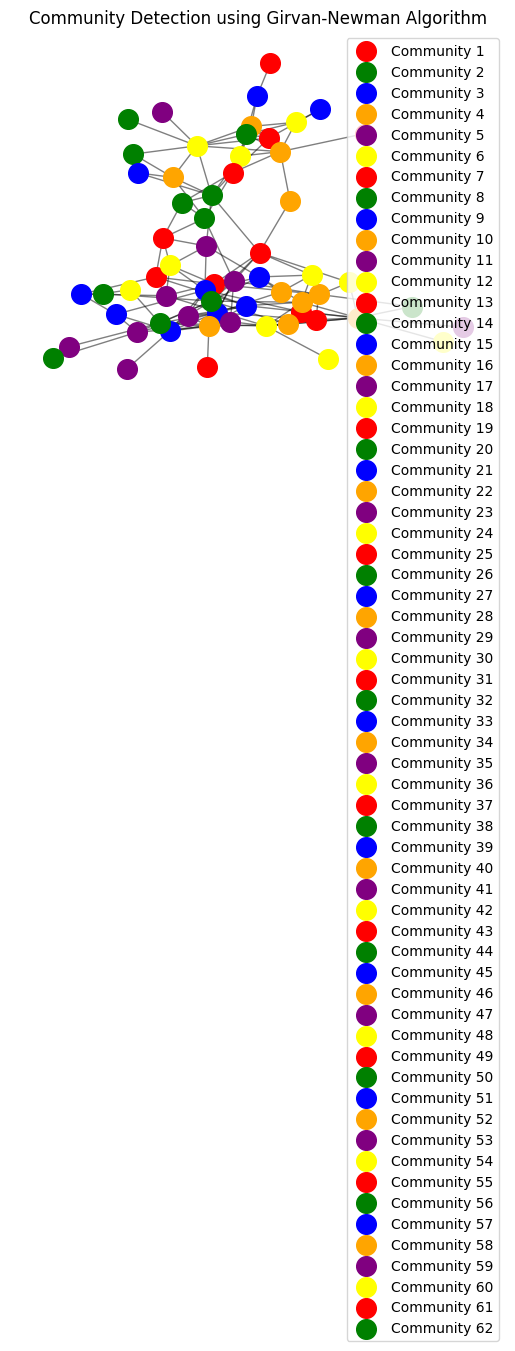

In [96]:
# Visualize the communities
pos = nx.spring_layout(G)  # Layout for the visualization

# Draw nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw each community with a different color
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
for i, community in enumerate(result):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community), node_color=colors[i % len(colors)], node_size=200, label=f'Community {i+1}')

# Set plot options
plt.title('Community Detection using Girvan-Newman Algorithm')
plt.legend()
plt.axis('off')
plt.show()

In [97]:
# Calculate metrics for each community
for i, community in enumerate(result):
    print(f"Community {i+1}:")
    print("Number of nodes:", len(community))
    cut = nx.cut_size(G, community, G.nodes)
    volume = nx.volume(G, community)
    conductance = cut / (2 * volume)
    print("Conductance:", conductance)
    print()

Community 1:
Number of nodes: 1
Conductance: 0.5

Community 2:
Number of nodes: 1
Conductance: 0.5

Community 3:
Number of nodes: 1
Conductance: 0.5

Community 4:
Number of nodes: 1
Conductance: 0.5

Community 5:
Number of nodes: 1
Conductance: 0.5

Community 6:
Number of nodes: 1
Conductance: 0.5

Community 7:
Number of nodes: 1
Conductance: 0.5

Community 8:
Number of nodes: 1
Conductance: 0.5

Community 9:
Number of nodes: 1
Conductance: 0.5

Community 10:
Number of nodes: 1
Conductance: 0.5

Community 11:
Number of nodes: 1
Conductance: 0.5

Community 12:
Number of nodes: 1
Conductance: 0.5

Community 13:
Number of nodes: 1
Conductance: 0.5

Community 14:
Number of nodes: 1
Conductance: 0.5

Community 15:
Number of nodes: 1
Conductance: 0.5

Community 16:
Number of nodes: 1
Conductance: 0.5

Community 17:
Number of nodes: 1
Conductance: 0.5

Community 18:
Number of nodes: 1
Conductance: 0.5

Community 19:
Number of nodes: 1
Conductance: 0.5

Community 20:
Number of nodes: 1
Conduct

## **3. LOUVAIN ALGORITHM**

In [98]:
import community.community_louvain as cl

In [99]:
# Apply the Louvain algorithm
partition = cl.best_partition(G)

In [100]:
# Print the communities
for node, community_id in partition.items():
    print(f"Node {node}: Community {community_id}")

Node Beak: Community 0
Node Beescratch: Community 1
Node Bumper: Community 0
Node CCL: Community 4
Node Cross: Community 3
Node DN16: Community 1
Node DN21: Community 1
Node DN63: Community 0
Node Double: Community 4
Node Feather: Community 1
Node Fish: Community 0
Node Five: Community 3
Node Fork: Community 2
Node Gallatin: Community 1
Node Grin: Community 2
Node Haecksel: Community 3
Node Hook: Community 2
Node Jet: Community 1
Node Jonah: Community 3
Node Knit: Community 0
Node Kringel: Community 2
Node MN105: Community 3
Node MN23: Community 1
Node MN60: Community 3
Node MN83: Community 3
Node Mus: Community 1
Node Notch: Community 1
Node Number1: Community 1
Node Oscar: Community 4
Node Patchback: Community 3
Node PL: Community 0
Node Quasi: Community 1
Node Ripplefluke: Community 1
Node Scabs: Community 2
Node Shmuddel: Community 2
Node SMN5: Community 3
Node SN100: Community 4
Node SN4: Community 2
Node SN63: Community 2
Node SN89: Community 4
Node SN9: Community 2
Node SN90: Co

In [101]:
# Create a dictionary to store the communities
communities = {}

# Populate the dictionary
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

# Print the communities
for community_id, nodes in communities.items():
    print(f"Community {community_id}: {nodes}")

Community 0: ['Beak', 'Bumper', 'DN63', 'Fish', 'Knit', 'PL', 'SN96', 'TR77']
Community 1: ['Beescratch', 'DN16', 'DN21', 'Feather', 'Gallatin', 'Jet', 'MN23', 'Mus', 'Notch', 'Number1', 'Quasi', 'Ripplefluke', 'SN90', 'TR82', 'Upbang', 'Wave', 'Web', 'Zig']
Community 4: ['CCL', 'Double', 'Oscar', 'SN100', 'SN89', 'Zap']
Community 3: ['Cross', 'Five', 'Haecksel', 'Jonah', 'MN105', 'MN60', 'MN83', 'Patchback', 'SMN5', 'Topless', 'Trigger', 'Vau']
Community 2: ['Fork', 'Grin', 'Hook', 'Kringel', 'Scabs', 'Shmuddel', 'SN4', 'SN63', 'SN9', 'Stripes', 'Thumper', 'TR120', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Whitetip', 'Zipfel']


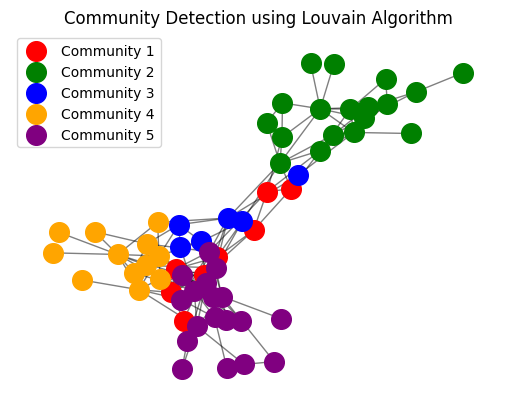

In [102]:
# Visualize the communities
pos = nx.spring_layout(G)  # Layout for the visualization

# Draw nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw each community with a different color
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
for i, (community_id, nodes) in enumerate(communities.items()):
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[i % len(colors)], node_size=200, label=f'Community {i+1}')

# Set plot options
plt.title('Community Detection using Louvain Algorithm')
plt.legend()
plt.axis('off')
plt.show()

In [103]:
def modularity(graph, partition):
    # Calculate the modularity of the partition
    return cl.modularity(partition, graph)

# Calculate metrics for each community
for i, community in enumerate(set(partition.values())):
    nodes = [node for node in partition.keys() if partition[node] == community]
    print(f"Community {i+1}:")
    print("Number of nodes:", len(nodes))
    print("Modularity:", modularity(G, partition))
    cut = nx.cut_size(G, nodes, G.nodes)
    volume = nx.volume(G, nodes)
    conductance = cut / (2 * volume)
    print("Conductance:", conductance)
    print()

Community 1:
Number of nodes: 8
Modularity: 0.5188283691309679
Conductance: 0.34146341463414637

Community 2:
Number of nodes: 18
Modularity: 0.5188283691309679
Conductance: 0.2710843373493976

Community 3:
Number of nodes: 18
Modularity: 0.5188283691309679
Conductance: 0.3088235294117647

Community 4:
Number of nodes: 12
Modularity: 0.5188283691309679
Conductance: 0.3125

Community 5:
Number of nodes: 6
Modularity: 0.5188283691309679
Conductance: 0.39285714285714285



**-----------------END OF THE COMMUNITY DETECTION------------------**